## Data Cleaning and Preprocessing

In [248]:
# importing libraries
import pandas as pd

In [249]:
# importing the data
df = pd.read_csv('Logan_housing.csv')

# showing the first 5 rows
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


In [250]:
# dropping columns we won't be using in this model
df.drop(columns=['Garage Capacity', 'Irregular Shape', 'Sold Terms', 'Zip', 'month_sold', 'Year Built', 'year_sold'], inplace = True)

In [251]:
# checking the number of null values in the dataset
df.isnull().sum()

Sold Price           0
DOM                  0
HOA Fee              0
Quadrant             0
School District      0
Total Bedrooms       0
Total Bathrooms      0
Total Square Feet    0
built_after_2000     0
dtype: int64

There are no missing values in the dataset so we are good to continue

In [252]:
# checking the dtype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold Price         4110 non-null   int64 
 1   DOM                4110 non-null   int64 
 2   HOA Fee            4110 non-null   int64 
 3   Quadrant           4110 non-null   object
 4   School District    4110 non-null   object
 5   Total Bedrooms     4110 non-null   int64 
 6   Total Bathrooms    4110 non-null   int64 
 7   Total Square Feet  4110 non-null   int64 
 8   built_after_2000   4110 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 289.1+ KB


In [253]:
# checking to see what data types each column should be
df.nunique()

Sold Price           1217
DOM                   248
HOA Fee                96
Quadrant                4
School District         2
Total Bedrooms          9
Total Bathrooms         7
Total Square Feet    2009
built_after_2000        2
dtype: int64

Based the above code the 'Quadrant', 'School District', and 'built_after_2000' only have 4 and 2 unique values which suggests they should be categorical data. 

In [254]:
# columns that we are converting
categorical_columns = ['Quadrant','School District','built_after_2000']
float_columns = ['Sold Price','HOA Fee']

# coverting the columns to categorical data
df[categorical_columns] = df[categorical_columns].astype('category')
df[float_columns] = df[float_columns].astype('float32')


In [255]:
# checking if the above code worked and the columns were changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sold Price         4110 non-null   float32 
 1   DOM                4110 non-null   int64   
 2   HOA Fee            4110 non-null   float32 
 3   Quadrant           4110 non-null   category
 4   School District    4110 non-null   category
 5   Total Bedrooms     4110 non-null   int64   
 6   Total Bathrooms    4110 non-null   int64   
 7   Total Square Feet  4110 non-null   int64   
 8   built_after_2000   4110 non-null   category
dtypes: category(3), float32(2), int64(4)
memory usage: 173.2 KB


It appears that the columns changed to what I wanted

In [256]:
# checking out the summary statistics on the dependent variable DOM
df['DOM'].describe().round(0)

count    4110.0
mean       41.0
std        52.0
min         1.0
25%         6.0
50%        23.0
75%        56.0
max       712.0
Name: DOM, dtype: float64

The number of days on the market ranges from 1 to 712 (which is almost 2 years)

In [257]:
# importing needed libraries
import seaborn as sns
import matplotlib.pyplot as plt

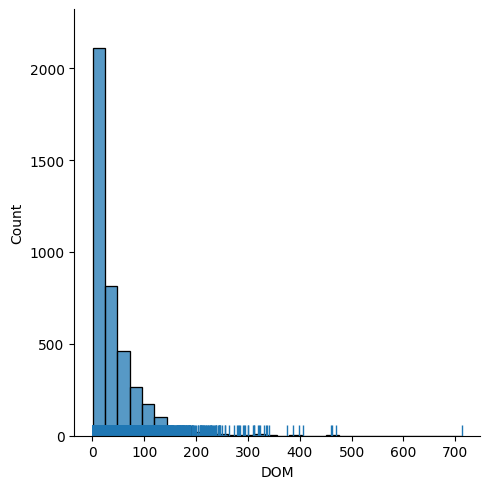

In [258]:
sns.displot(df['DOM'], bins = 30, rug = True)
plt.show()

The distribution of the days on market is right skewed with the majority of data below 100 days.

In [259]:
#importing needed libraries
import numpy as np

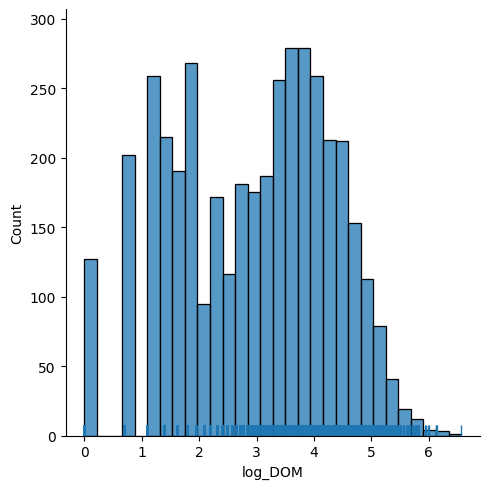

In [260]:
# adding a new column to the dataframe where it is the log of DOM
df['log_DOM'] = np.log(df['DOM'])

# plotting the new column
sns.displot(df['log_DOM'], bins = 30, rug = True)
plt.show()

## Regression Analysis

In [261]:
# importing needed library
import statsmodels.formula.api as smf

In order to use statsmodels we need to make sure all column names don't have spaces

In [262]:
# removing spaces in column names
df.columns = df.columns.str.replace(' ','_')
df

,Sold_Price,DOM,HOA_Fee,Quadrant,School_District,Total_Bedrooms,Total_Bathrooms,Total_Square_Feet,built_after_2000,log_DOM
0,176000.0,5,0.0,NW,Cache,3,1,1031,0,1.609438
1,225000.0,6,0.0,NW,Cache,4,2,2091,0,1.791759
2,274900.0,14,0.0,NW,Cache,3,1,2016,0,2.639057
3,175000.0,16,0.0,NW,Cache,4,1,1920,0,2.772589
4,179000.0,29,0.0,NW,Cache,4,2,1329,0,3.367296
...,...,...,...,...,...,...,...,...,...,...
4105,1225000.0,712,0.0,SW,Cache,6,5,6546,1,6.568078
4106,272000.0,6,0.0,SW,Cache,5,2,2250,0,1.791759
4107,298000.0,40,0.0,SW,Cache,4,2,2260,0,3.688879
4108,215000.0,49,0.0,SW,Cache,4,2,2250,0,3.891820


In [263]:
df = pd.get_dummies(data=df, columns=['Quadrant','School_District'], drop_first=True)
df

,Sold_Price,DOM,HOA_Fee,Total_Bedrooms,Total_Bathrooms,Total_Square_Feet,built_after_2000,log_DOM,Quadrant_NW,Quadrant_SE,Quadrant_SW,School_District_Logan
0,176000.0,5,0.0,3,1,1031,0,1.609438,True,False,False,False
1,225000.0,6,0.0,4,2,2091,0,1.791759,True,False,False,False
2,274900.0,14,0.0,3,1,2016,0,2.639057,True,False,False,False
3,175000.0,16,0.0,4,1,1920,0,2.772589,True,False,False,False
4,179000.0,29,0.0,4,2,1329,0,3.367296,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4105,1225000.0,712,0.0,6,5,6546,1,6.568078,False,False,True,False
4106,272000.0,6,0.0,5,2,2250,0,1.791759,False,False,True,False
4107,298000.0,40,0.0,4,2,2260,0,3.688879,False,False,True,False
4108,215000.0,49,0.0,4,2,2250,0,3.891820,False,False,True,False


In [264]:
reg1 = smf.ols(formula='DOM ~ Sold_Price + HOA_Fee + Total_Bedrooms + Total_Bathrooms + Total_Square_Feet + built_after_2000 + Quadrant_NW + Quadrant_SE + Quadrant_SW + School_District_Logan', data=df).fit()
reg2 = smf.ols(formula='log_DOM ~ Sold_Price + HOA_Fee + Total_Bedrooms + Total_Bathrooms + Total_Square_Feet + built_after_2000 + Quadrant_NW + Quadrant_SE + Quadrant_SW + School_District_Logan', data=df).fit()

In [265]:
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                    DOM   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     47.45
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           2.73e-90
Time:                        19:42:24   Log-Likelihood:                -21812.
No. Observations:                4110   AIC:                         4.365e+04
Df Residuals:                    4099   BIC:                         4.372e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

It would appear the southwest quadrant is selling fastest. This is because it has the smallest coef. If the HOA Fee goes up by $100 it would increase the DOM by 5.86%

In [266]:
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                log_DOM   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     43.11
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           6.17e-82
Time:                        19:42:25   Log-Likelihood:                -6944.5
No. Observations:                4110   AIC:                         1.391e+04
Df Residuals:                    4099   BIC:                         1.398e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

The number of bedrooms has a negative impact on the DOM. This means that the more bedrooms the house has the fewer number of days on the market it will be. 

In [267]:
from statsmodels.tools import eval_measures

In [268]:
predictions = reg1.predict()
actuals = df.DOM
np.array(actuals[0:10])

array([  5,   6,  14,  16,  29, 130, 463,  37,  38, 115])

In [269]:
np.array(reg1.resid[0:10])

array([-13.72535139, -27.58020193, -20.69364712, -14.18777889,
         8.35076871,  93.7061996 , 378.01361893, -37.25234957,
       -27.2405666 , 100.81956813])

#### MEAN ABSOLUTE ERROR

In [270]:
eval_measures.meanabs(actuals, predictions)

33.5698461414534

This is saying the average error is 33 days.

#### MEAN SQUARED ERROR

In [271]:
eval_measures.medianabs(actuals, predictions)

25.661473640590565

#### ROOT MEAN SQUARED ERROR

In [272]:
eval_measures.rmse(actuals, predictions)

48.817291654632

#### ROOT MEAN SQUARED PERCENTAGE ERROR

In [273]:
eval_measures.rmspe(actuals, predictions)

83.16233955286049

This means that the errors are 8316% off which can't be right. 

In [274]:
np.sqrt(np.mean(((actuals-predictions)/actuals)**2))

8.31623395528605

By doing the formula our selves the number is changed to 831.6%. This is still a large number indicating the model is not performing well. You can interpret the RMSPE as an average percentage error we can expect to get from the model. For context the days on the market could 800+ percent off the actual based on the current model. 

The MAE and RMSE are in daily units. This is showing the average number of days on the market that we are off in our predictions 